# Data Analysis and Plotting of US COVID data using Python/Pandas

#### Set up

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from math import e

#### 1)-3) Load Data
1) Download US COVID data from this [link](https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv)

2) Input the data and create a panda data frame 

3) Display the first 10 rows of the table 

In [17]:
# import data
covid = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv')
covid.date = pd.to_datetime(covid.date)
covid.set_index('date', inplace=True)

# log scale switch
log_scale = True

# display the first 10 rows of the table 
print(covid.head(10))

            cases  deaths
date                     
2020-01-21      1       0
2020-01-22      1       0
2020-01-23      1       0
2020-01-24      2       0
2020-01-25      3       0
2020-01-26      5       0
2020-01-27      5       0
2020-01-28      5       0
2020-01-29      5       0
2020-01-30      6       0


#### 4) Use Matplotlib or Pandas built-in plot to plot the numbers of daily total cases and deaths (this is what is in the dataset) between January to end of August. Use bars to display cases and red line to show the death in a single chart 

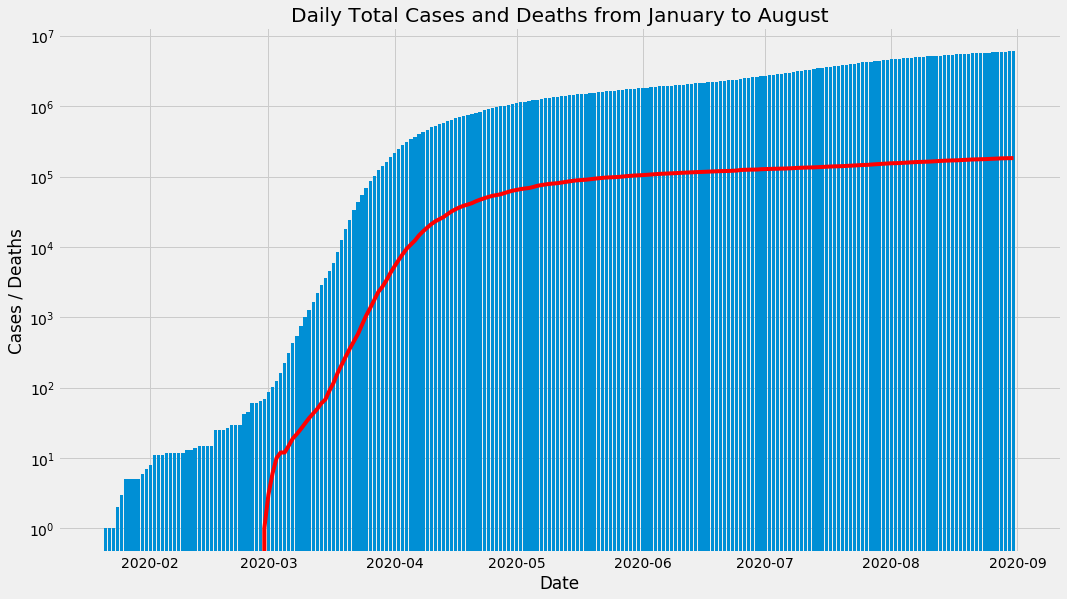

In [18]:
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme
plt.rcParams['figure.figsize'] = (16,9)

covid_J2A = covid[covid.index <= '2020-08-31'] # subsetting our dataframe

plt.bar(covid_J2A.index, covid_J2A.cases)
plt.plot(covid_J2A.deaths, color='red')

plt.title('Daily Total Cases and Deaths from January to August')
plt.xlabel('Date')
plt.ylabel('Cases / Deaths')
plt.yscale('log') if log_scale else _ # convert to log scale

plt.show()

#### 5) Compute the daily new cases and new deaths, and assign the result to a new data frame . Show the first 10 rows of your table

In [19]:
covid_new = pd.DataFrame()
covid_new['new_cases'] = covid.cases - covid.cases.shift(1)
covid_new['new_deaths'] = covid.deaths - covid.deaths.shift(1)

covid_new = covid_new.fillna(0)
print(covid_new.head(10))

            new_cases  new_deaths
date                             
2020-01-21        0.0         0.0
2020-01-22        0.0         0.0
2020-01-23        0.0         0.0
2020-01-24        1.0         0.0
2020-01-25        1.0         0.0
2020-01-26        2.0         0.0
2020-01-27        0.0         0.0
2020-01-28        0.0         0.0
2020-01-29        0.0         0.0
2020-01-30        1.0         0.0


#### 6) Plot the daily new cases and deaths  from (5) in the same way as in (4) 

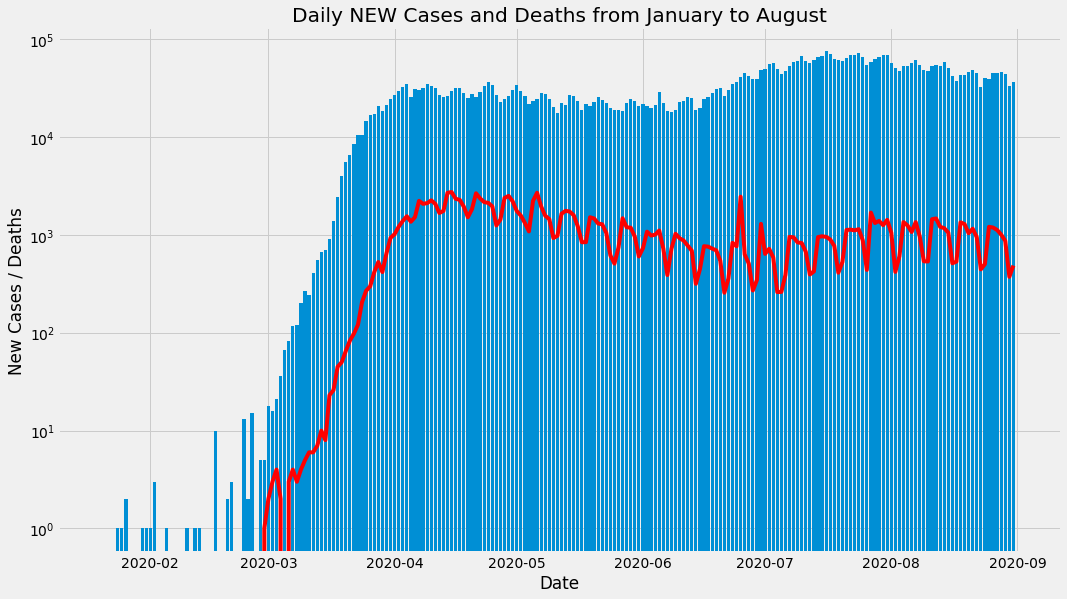

In [20]:
covid_new_J2A = covid_new[covid_new.index <= '2020-08-31'] # subsetting our dataframe

plt.bar(covid_new_J2A.index, covid_new_J2A.new_cases)
plt.plot(covid_new_J2A.new_deaths, color='red')

plt.title('Daily NEW Cases and Deaths from January to August')
plt.xlabel('Date')
plt.ylabel('New Cases / Deaths')
plt.yscale('log') if log_scale else _ # convert to log scale

plt.show()

#### 7) Calculate 7 days average of daily new cases and deaths, and assign the result to a new data frame. Show the first 10 rows of your table. 

In [21]:
covid_7d = pd.DataFrame()
covid_7d['avg_cases'] = covid_new.new_cases.rolling(window=7).mean()
covid_7d['avg_deaths'] = covid_new.new_deaths.rolling(window=7).mean()

covid_7d = covid_7d.fillna(0)
print(covid_7d.head(10))

            avg_cases  avg_deaths
date                             
2020-01-21   0.000000         0.0
2020-01-22   0.000000         0.0
2020-01-23   0.000000         0.0
2020-01-24   0.000000         0.0
2020-01-25   0.000000         0.0
2020-01-26   0.000000         0.0
2020-01-27   0.571429         0.0
2020-01-28   0.571429         0.0
2020-01-29   0.571429         0.0
2020-01-30   0.714286         0.0


#### 8) Plot the 7 days averaged new cases and deaths from (7) in the same way as in (4) 

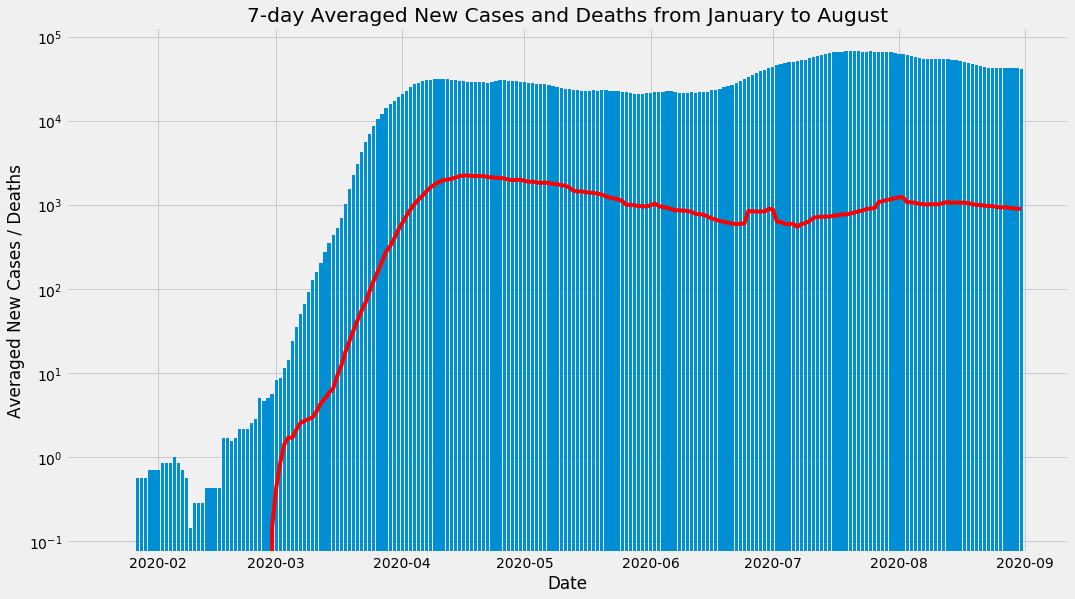

In [22]:
covid_7d_J2A = covid_7d[covid_7d.index <= '2020-08-31'] # subsetting our dataframe

plt.bar(covid_7d_J2A.index, covid_7d_J2A.avg_cases)
plt.plot(covid_7d_J2A.avg_deaths, color='red')

plt.title('7-day Averaged New Cases and Deaths from January to August')
plt.xlabel('Date')
plt.ylabel('Averaged New Cases / Deaths')
plt.yscale('log') if log_scale else _ # convert to log scale

plt.show()

#### 9) Calculate monthly average of per day new cases and deaths, and assign the result into a new data frame. Display the numbers by month in ascending order 

In [23]:
covid_mthly = pd.DataFrame()

#covid_mthly['m_avg_cases'] = covid_new.groupby(covid_new.index.strftime('%B')).new_cases.mean()
#covid_mthly['m_avg_cases'] = covid_new.groupby(covid_new.index.month).new_cases.mean().reset_index()

covid_mthly['m_avg_cases'] = covid_new.groupby(pd.Grouper(level='date', freq='1M')).new_cases.mean()
covid_mthly['m_avg_deaths'] = covid_new.groupby(pd.Grouper(level='date', freq='1M')).new_deaths.mean()

covid_mthly.index = covid_mthly.index.strftime('%B')
#covid_mthly.sort_values(by='m_avg_cases')

print(covid_mthly)

            m_avg_cases  m_avg_deaths
January        0.545455      0.000000
February       2.172414      0.034483
March       6077.129032    138.806452
April      29576.500000   1961.200000
May        23339.193548   1330.258065
June       28465.733333    769.433333
July       61878.677419    851.580645
August     47544.225806    955.258065
September  37900.000000    805.923077


#### 10) Plot the monthly averaged per day new cases and deaths from (9)  in the same way as in (4) 

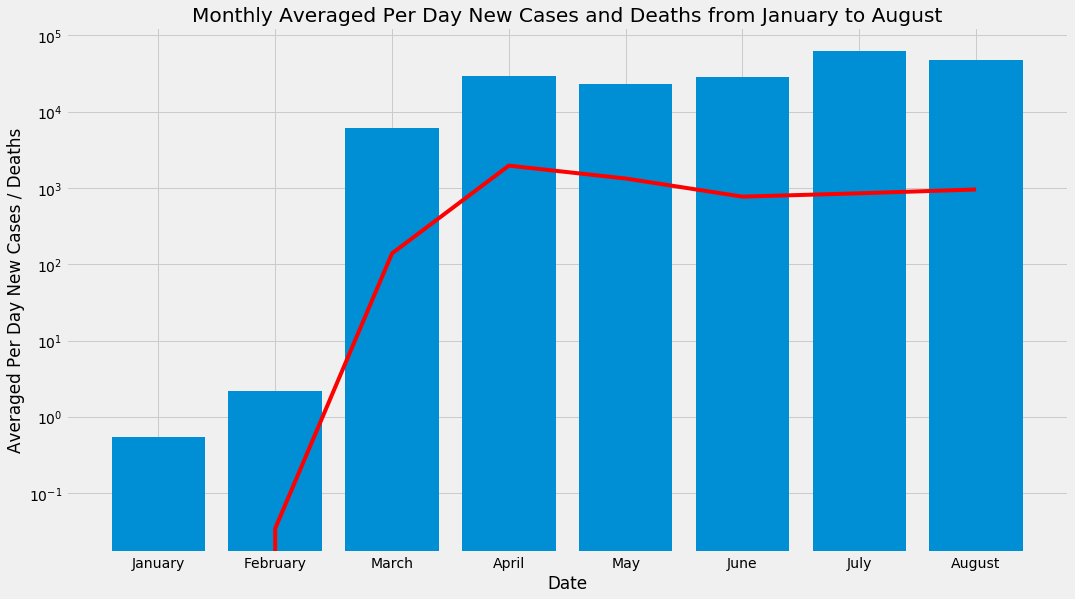

In [24]:
covid_mthly_J2A = covid_mthly[covid_mthly.index != 'September'] # subsetting our dataframe

plt.bar(covid_mthly_J2A.index, covid_mthly_J2A.m_avg_cases)
plt.plot(covid_mthly_J2A.m_avg_deaths, color='red')

plt.title('Monthly Averaged Per Day New Cases and Deaths from January to August')
plt.xlabel('Date')
plt.ylabel('Averaged Per Day New Cases / Deaths')
plt.yscale('log') if log_scale else _ # convert to log scale

plt.show()

#### 11) Identify the top and bottom 10 days of new cases and show the dates and the numbers 

In [25]:
print(covid_new.sort_values(by='new_cases',ascending=False).head(10).loc[:,['new_cases']])
print()
print(covid_new.sort_values(by='new_cases',ascending=True).head(10).loc[:,['new_cases']])

            new_cases
date                 
2020-07-16    75682.0
2020-07-24    73524.0
2020-07-17    70922.0
2020-07-23    70004.0
2020-07-22    69737.0
2020-07-30    69111.0
2020-07-31    69059.0
2020-07-15    68336.0
2020-07-10    68224.0
2020-07-25    66776.0

            new_cases
date                 
2020-01-21        0.0
2020-02-27        0.0
2020-02-23        0.0
2020-02-22        0.0
2020-02-19        0.0
2020-02-18        0.0
2020-02-16        0.0
2020-02-15        0.0
2020-02-14        0.0
2020-02-09        0.0


#### 12) Identify the top and bottom 10 days of new deaths and show the dates and the numbers 

In [26]:
print(covid_new.sort_values(by='new_deaths',ascending=False).head(10).loc[:,['new_deaths']])
print()
print(covid_new.sort_values(by='new_deaths',ascending=True).head(10).loc[:,['new_deaths']])

            new_deaths
date                  
2020-04-15      2752.0
2020-05-06      2708.0
2020-04-14      2705.0
2020-04-21      2672.0
2020-04-29      2514.0
2020-06-25      2466.0
2020-04-28      2394.0
2020-04-22      2371.0
2020-04-16      2349.0
2020-04-17      2289.0

            new_deaths
date                  
2020-01-21         0.0
2020-02-12         0.0
2020-02-13         0.0
2020-02-14         0.0
2020-02-15         0.0
2020-02-16         0.0
2020-02-17         0.0
2020-02-18         0.0
2020-02-19         0.0
2020-02-20         0.0


#### 13) Identify the top five weeks that had the most increase in cases. Show your result in a table that indicates the week and number 

In [27]:
covid_wkly = pd.DataFrame()

covid_wkly['w_cases'] = covid_new.groupby(pd.Grouper(level='date', freq='W')).new_cases.sum()

#covid_wkly.index = covid_wkly.index.strftime('%U')

print(covid_wkly.sort_values(by='w_cases',ascending=False).head(5))

             w_cases
date                
2020-07-19  466827.0
2020-07-26  459412.0
2020-08-02  434690.0
2020-07-12  407471.0
2020-08-09  377314.0


#### 14) Identify the top five weeks that had the most increase in deaths. Show your result in a table that indicates the week and number

In [28]:
covid_wkly['w_deaths'] = covid_new.groupby(pd.Grouper(level='date', freq='W')).new_deaths.sum()

#covid_wkly.index = covid_wkly.index.strftime('%U')

print(covid_wkly.sort_values(by='w_deaths',ascending=False).head(5).loc[:,['w_deaths']])

            w_deaths
date                
2020-04-19   15330.0
2020-04-26   14401.0
2020-04-12   13993.0
2020-05-03   13236.0
2020-05-10   11950.0


#### 15) Display (4) (6) (8) (10) together as subplots with clear subplot titles

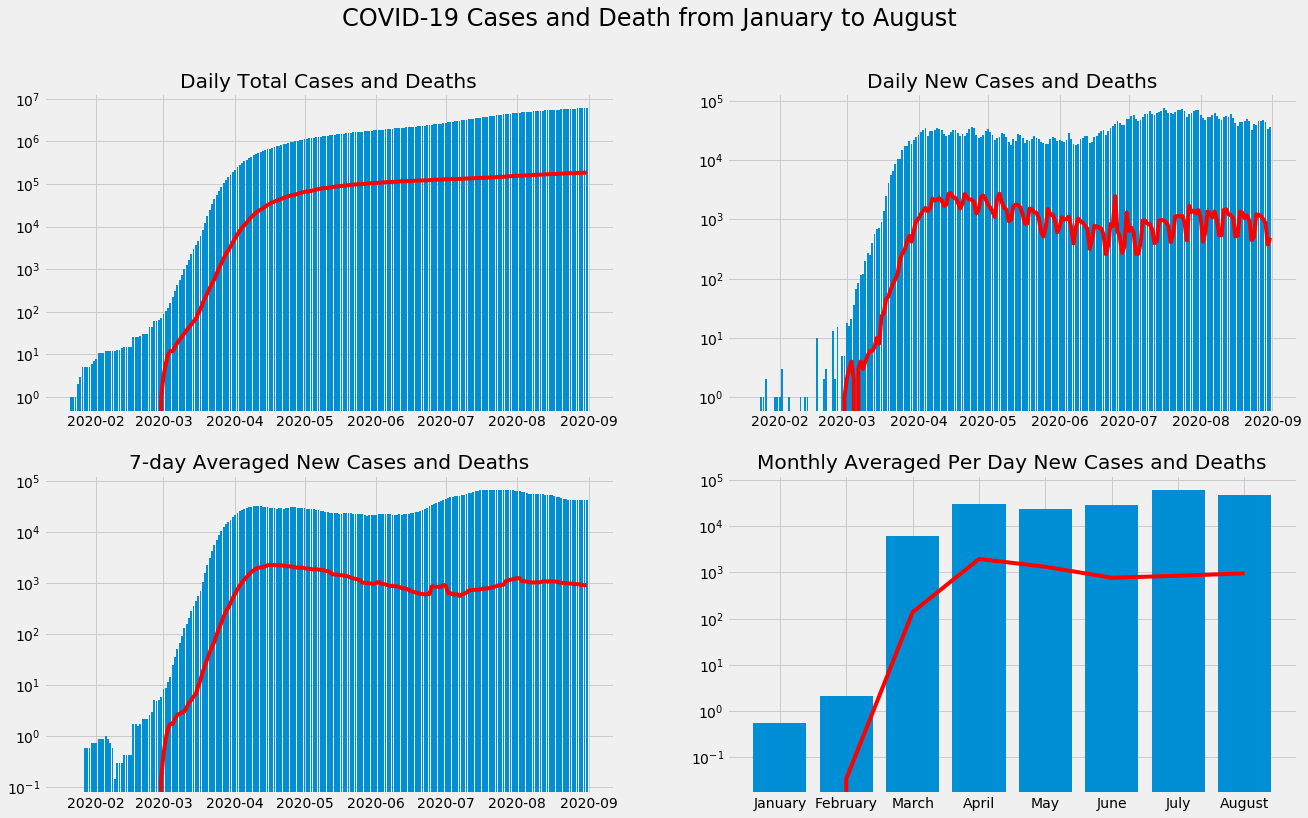

In [29]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (20,12)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('COVID-19 Cases and Death from January to August',size=24)

ax1.bar(covid_J2A.index, covid_J2A.cases)
ax1.plot(covid_J2A.deaths, color='red')
ax1.title.set_text('Daily Total Cases and Deaths')
ax1.set_yscale('log') if log_scale else _ # convert to log scale

ax2.bar(covid_new_J2A.index, covid_new_J2A.new_cases)
ax2.plot(covid_new_J2A.new_deaths, color='red')
ax2.title.set_text('Daily New Cases and Deaths')
ax2.set_yscale('log') if log_scale else _ # convert to log scale

ax3.bar(covid_7d_J2A.index, covid_7d_J2A.avg_cases)
ax3.plot(covid_7d_J2A.avg_deaths, color='red')
ax3.title.set_text('7-day Averaged New Cases and Deaths')
ax3.set_yscale('log') if log_scale else _ # convert to log scale

ax4.bar(covid_mthly_J2A.index, covid_mthly_J2A.m_avg_cases)
ax4.plot(covid_mthly_J2A.m_avg_deaths, color='red')
ax4.title.set_text('Monthly Averaged Per Day New Cases and Deaths')
ax4.set_yscale('log') if log_scale else _ # convert to log scale